In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
train_dir = '/content/drive/MyDrive/Data/train'
validation_dir = '/content/drive/MyDrive/Data/validation'

train_matang = os.listdir(train_dir + '/matang/')
train_tidak_matang= os.listdir(train_dir + '/mentah/')

In [4]:
# Membuat objek ImageDataGenerator untuk augmentation dan normalisasi data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan objek ImageDataGenerator untuk memuat data training dan validasi
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 197 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [5]:
# Menginisialisasi model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes: matang dan tidak matang

# Mengompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Melatih model
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=validation_generator, validation_steps=len(validation_generator))

Epoch 1/10
7/7 [==============================] - 118s 14s/step - loss: 0.7262 - accuracy: 0.4467 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 2/10
7/7 [==============================] - 4s 593ms/step - loss: 0.6944 - accuracy: 0.4822 - val_loss: 0.6938 - val_accuracy: 0.4949
Epoch 3/10
7/7 [==============================] - 4s 567ms/step - loss: 0.6935 - accuracy: 0.4924 - val_loss: 0.6932 - val_accuracy: 0.4949
Epoch 4/10
7/7 [==============================] - 4s 549ms/step - loss: 0.6929 - accuracy: 0.5279 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 5/10
7/7 [==============================] - 5s 646ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 6/10
7/7 [==============================] - 4s 535ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 7/10
7/7 [==============================] - 4s 545ms/step - loss: 0.6968 - accuracy: 0.5076 - val_loss: 0.6932 - val_accuracy: 0.5051
Epoch 8/10
7/7 [====

In [6]:
# Menyimpan model ke file
model.save('/content/drive/MyDrive/Data Deep Learning/vgg16_model.h5')

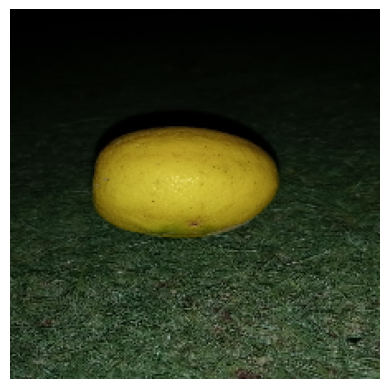

1/1 [==============================] - 1s 1s/step
Hasil Prediksi: Matang


In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path ke gambar yang ingin diuji
test_image_path = '/content/WhatsApp Image 2023-05-26 at 22.58.57.jpg'

# Memuat gambar
test_image = image.load_img(test_image_path, target_size=(224, 224))

# Menampilkan gambar
plt.imshow(test_image)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi bentuk array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Melakukan prediksi
predictions = model.predict(test_image)
class_index = np.argmax(predictions[0])
if class_index == 0:
    class_label = 'Matang'
else:
    class_label = 'Tidak Matang'

# Menampilkan hasil prediksi
print('Hasil Prediksi: {}'.format(class_label))
